In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [7]:
d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95)) & (d.i == 0) & (d.nmappers <=16)]
d2['pkg_watts_avg'] += 40.0
scatterm = {
    100.0: '^',
    200.0: 'o',
    300.0: 'v',
    400.0: '*'
}

/tmp/ipykernel_970997/3425568749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['pkg_watts_avg'] += 40.0


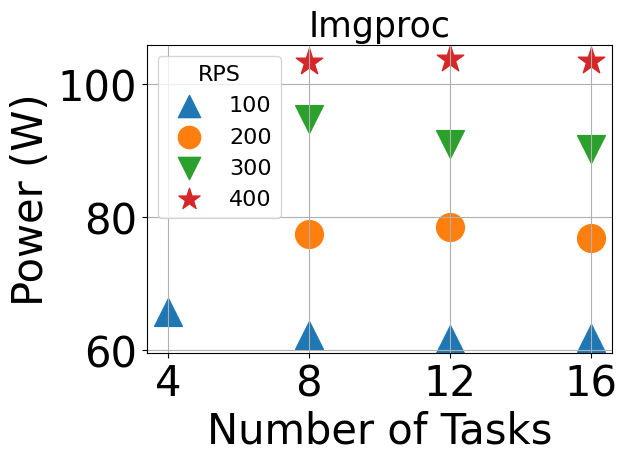

In [8]:
plt.rcParams['figure.figsize'] = 6,4
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

#plt.scatter(d2['nmappers'], d2['pkg_watts_avg'], c=d2['rate'], cmap='viridis', s=400)
for rk in d2['rate'].unique().tolist():
    d3 = d2[d2.rate==rk]
    plt.scatter(d3['nmappers'], d3['pkg_watts_avg'], s=400, marker=scatterm[rk], label=f"{int(rk)}")
    
#plt.colorbar(label='RPS')
plt.xticks(d2.nmappers.unique())
plt.xlabel('Number of Tasks')
plt.ylabel('Power (W)')
plt.title('Imgproc', size=25)
plt.legend(markerscale=0.8, fontsize=16, title="RPS", title_fontsize=16)
#plt.ylim(bottom=0)
#plt.xlim(left=0)
plt.grid()
plt.savefig("imgprocdiffmappers.pdf", bbox_inches='tight')


# Analysis

In [16]:
d2[(d2.rate==100)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
0,4,25.72
1,8,22.27
3,16,21.84


In [17]:
d2[(d2.rate==200)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
7,8,37.52
9,16,36.93


In [18]:
d2[(d2.rate==300)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
13,8,54.77
15,16,50.27


In [19]:
d2[(d2.rate==400)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
19,8,63.45
21,16,63.51
